# Notebbook #1 Exploring the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
cleaned_players_16 = pd.read_csv("../raw_data/2016-17/cleaned_players.csv")
cleaned_players_18 = pd.read_csv("../raw_data/2017-18/cleaned_players.csv")
cleaned_players_19 = pd.read_csv("../raw_data/2018-19/cleaned_players.csv")
cleaned_players_20 = pd.read_csv("../raw_data/2019-20/cleaned_players.csv")
cleaned_players_21 = pd.read_csv("../raw_data/2020-21/cleaned_players.csv")

In [3]:
players_raw_16 = pd.read_csv("../raw_data/2016-17/players_raw.csv")
players_raw_18 = pd.read_csv("../raw_data/2017-18/players_raw.csv")
players_raw_19 = pd.read_csv("../raw_data/2018-19/players_raw.csv")
players_raw_20 = pd.read_csv("../raw_data/2019-20/players_raw.csv")
players_raw_21 = pd.read_csv("../raw_data/2020-21/players_raw.csv")

### Useless
*** COUNTING NUMBER OF PLAYES AND FEATURES IN EACH DATABASE ***

for cleaned & raw

In [22]:
cleaned = [cleaned_players_16, cleaned_players_18, cleaned_players_19, cleaned_players_20, cleaned_players_21]

In [23]:
for year in cleaned:
    print(f"nb of players = {len(year)} for {len(year.columns)} features")

nb of players = 683 for 17 features
nb of players = 647 for 18 features
nb of players = 624 for 18 features
nb of players = 666 for 18 features
nb of players = 713 for 19 features


In [12]:
raw = [players_raw_16, players_raw_18, players_raw_19, players_raw_20, players_raw_21]

In [25]:
for year in raw:
    print(f"nb of players = {len(year)} for {len(year.columns)} features")

nb of players = 683 for 57 features
nb of players = 647 for 58 features
nb of players = 624 for 58 features
nb of players = 666 for 61 features
nb of players = 713 for 67 features


*** LOOKING AT WHICH FEATURES WERE ADDED OVER THE YEARS ***

for cleaned & raw

In [32]:
features = players_raw_16.columns

In [35]:
start = 2016
for year in raw:
    print(start)
    start += 1
    for feat in year.columns:
        if feat not in features:
            print(feat)
        pass

2016
2017
news_added
2018
news_added
2019
creativity_rank
creativity_rank_type
ict_index_rank
ict_index_rank_type
influence_rank
influence_rank_type
news_added
threat_rank
threat_rank_type
2020
corners_and_indirect_freekicks_order
corners_and_indirect_freekicks_text
creativity_rank
creativity_rank_type
direct_freekicks_order
direct_freekicks_text
ict_index_rank
ict_index_rank_type
influence_rank
influence_rank_type
news_added
penalties_order
penalties_text
threat_rank
threat_rank_type


In [38]:
cleaned_players_16.columns

Index(['first_name', 'second_name', 'goals_scored', 'assists', 'total_points',
       'minutes', 'goals_conceded', 'creativity', 'influence', 'threat',
       'bonus', 'bps', 'ict_index', 'clean_sheets', 'red_cards',
       'yellow_cards', 'selected_by_percent'],
      dtype='object')

In [44]:
players_raw_16.dtypes

assists                           int64
bonus                             int64
bps                               int64
chance_of_playing_next_round     object
chance_of_playing_this_round     object
clean_sheets                      int64
code                              int64
cost_change_event                 int64
cost_change_event_fall            int64
cost_change_start                 int64
cost_change_start_fall            int64
creativity                      float64
dreamteam_count                   int64
ea_index                          int64
element_type                      int64
ep_next                          object
ep_this                         float64
event_points                      int64
first_name                       object
form                            float64
goals_conceded                    int64
goals_scored                      int64
ict_index                       float64
id                                int64
in_dreamteam                       bool


In [51]:
players_raw_16.element_type.value_counts()

3    292
2    214
4    104
1     73
Name: element_type, dtype: int64

In [65]:
players_raw_16[["first_name", "second_name", "value_season", "total_points", "event_points", "chance_of_playing_next_round", "ep_this", "ep_next"]]



,first_name,second_name,value_season,total_points,event_points,chance_of_playing_next_round,ep_this,ep_next
0,David,Ospina,0.4,2,0,100,0.0,0.0
1,Petr,Cech,24.8,134,4,100,0.0,6.0
2,Laurent,Koscielny,19.8,121,-2,0,0.0,1.7
3,Per,Mertesacker,0.2,1,1,100,0.0,0.0
4,Gabriel Armando,de Abreu,9.4,45,0,75,0.0,1.0
...,...,...,...,...,...,...,...,...
678,Sam,Surridge,0.0,0,0,None,0.6,None
679,Angel,Gomes,0.2,1,1,None,2.4,None
680,Kieran,O'Hara,0.0,0,0,None,2.2,None
681,Gerhard,Tremmel,0.0,0,0,None,1.2,None


*** NOTES ***

In players_raw:
- event_points are the number of points for the plays during the last game
- chance_of_playing_next_round == 100, 75, 50, 0 or None (20% none)
- 

In [63]:
players_raw_16["value_season"].value_counts()

0.0     163
0.2      18
2.9       9
18.0      8
0.4       8
       ... 
13.4      1
23.2      1
6.2       1
19.6      1
10.6      1
Name: value_season, Length: 219, dtype: int64

### PLAYER ANALYSIS

In [73]:
kane_17 = pd.read_csv("../raw_data/2016-17/players/Harry_Kane/gw.csv")
kane_18 = pd.read_csv("../raw_data/2017-18/players/Harry_Kane/gw.csv")
kane_19 = pd.read_csv("../raw_data/2018-19/players/Harry_Kane_372/gw.csv")
kane_20 = pd.read_csv("../raw_data/2019-20/players/Harry_Kane_338/gw.csv")
kane_21 = pd.read_csv("../raw_data/2020-21/players/Harry_Kane_388/gw.csv")

In [91]:
clean_kane_17 = pd.read_csv("../raw_data/2016-17/cleaned_players.csv")
clean_kane_17 = clean_kane_17[clean_kane_17["second_name"] == "Kane"]

In [96]:
clean_kane_17

,first_name,second_name,goals_scored,assists,total_points,minutes,goals_conceded,creativity,influence,threat,bonus,bps,ict_index,clean_sheets,red_cards,yellow_cards,selected_by_percent
402,Harry,Kane,29,7,224,2523,19,548.4,1279.0,1530,33,920,336.0,14,0,3,23.3


In [97]:
kane_17

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,0,22,0,0,0,5,0,1,17,15.3,...,1,4.0,2,0,0,0,110,False,0,0
1,1,29,0,0,0,19,1,0,20,23.8,...,1,41.0,5,-32117,13110,45227,110,True,0,0
2,0,19,0,0,0,2,0,1,6,10.6,...,1,6.0,2,-124703,6334,131037,109,True,0,0
3,0,16,0,0,0,28,1,3,10,5.8,...,0,50.0,6,8509,81771,73262,109,False,0,0
4,0,16,0,1,3,38,1,0,14,52.8,...,1,109.0,9,20666,45347,24681,109,True,1,0
5,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-258413,4978,263391,108,False,0,0
6,0,0,0,0,0,0,0,0,0,0.0,...,2,0.0,0,-62727,343,63070,108,True,0,0
7,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-24205,432,24637,107,False,0,0
8,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,-8786,347,9133,107,False,0,0
9,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-5610,397,6007,107,True,0,0


*** LOOKING IF THERE ARE ANY DIFFERENCES IN THE FETAURES FOR EACH YEAR ***

In [127]:
kanne_list = [kane_17, kane_18, kane_19, kane_20, kane_21]
features = kane_21.columns
dropped_feats = []
start = 2017

for year in kanne_list:
    print(start, len(year.columns))
    start += 1
    for feat in year.columns:
        if feat not in features:
            if feat not in dropped_feats:
                dropped_feats.append(f'{feat}')
        pass

for i in dropped_feats:
    print(i)

2017 54
2018 54
2019 54
2020 31
2021 31
attempted_passes
big_chances_created
big_chances_missed
clearances_blocks_interceptions
completed_passes
dribbles
ea_index
errors_leading_to_goal
errors_leading_to_goal_attempt
fouls
id
key_passes
kickoff_time_formatted
loaned_in
loaned_out
offside
open_play_crosses
penalties_conceded
recoveries
tackled
tackles
target_missed
winning_goals


*** MERGING FIRST 3 YEARS ***

    step 1 : change index for kane_18 and kane_19 - so that each year starts where the one before ended
    step 2 = merge

In [181]:
kane_17.shape, kane_18.shape, kane_19.shape

((38, 54), (38, 54), (38, 54))

In [192]:
game = np.linspace(38,75,38,dtype=int)
game2 = np.linspace(76,114,38,dtype=int)
kane_18.set_index(game, inplace = True)
kane_19.set_index(game2, inplace = True)

In [194]:
frames = [kane_17, kane_18, kane_19]
kane_17_19 = pd.concat(frames)

In [195]:
kane_17_19

,assists,attempted_passes,big_chances_created,big_chances_missed,bonus,bps,clean_sheets,clearances_blocks_interceptions,completed_passes,creativity,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,winning_goals,yellow_cards
0,0,22,0,0,0,5,0,1,17,15.3,...,1,4.0,2,0,0,0,110,False,0,0
1,1,29,0,0,0,19,1,0,20,23.8,...,1,41.0,5,-32117,13110,45227,110,True,0,0
2,0,19,0,0,0,2,0,1,6,10.6,...,1,6.0,2,-124703,6334,131037,109,True,0,0
3,0,16,0,0,0,28,1,3,10,5.8,...,0,50.0,6,8509,81771,73262,109,False,0,0
4,0,16,0,1,3,38,1,0,14,52.8,...,1,109.0,9,20666,45347,24681,109,True,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-70469,169,70638,126,False,0,0
110,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-70469,169,70638,126,True,0,0
111,0,0,0,0,0,0,0,0,0,0.0,...,0,0.0,0,-13971,98,14069,126,True,0,0
112,0,0,0,0,0,0,0,0,0,0.0,...,1,0.0,0,-8066,92,8158,126,False,0,0


### *** FEATURE SELCT ***

In [137]:
y = kane_17_19.total_points

In [140]:
all_x = kane_17_19.drop("total_points", axis = 1)

In [144]:
all_x.drop(columns = ["kickoff_time","kickoff_time_formatted"], inplace = True,axis = 1)

In [151]:
all_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 37
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   assists                          114 non-null    int64  
 1   attempted_passes                 114 non-null    int64  
 2   big_chances_created              114 non-null    int64  
 3   big_chances_missed               114 non-null    int64  
 4   bonus                            114 non-null    int64  
 5   bps                              114 non-null    int64  
 6   clean_sheets                     114 non-null    int64  
 7   clearances_blocks_interceptions  114 non-null    int64  
 8   completed_passes                 114 non-null    int64  
 9   creativity                       114 non-null    float64
 10  dribbles                         114 non-null    int64  
 11  ea_index                         114 non-null    int64  
 12  element                

*** ENCODING ***

In [147]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(all_x.was_home)

LabelEncoder()

In [150]:
all_x["was_home"] = encoder.transform(all_x.was_home)

<AxesSubplot:>

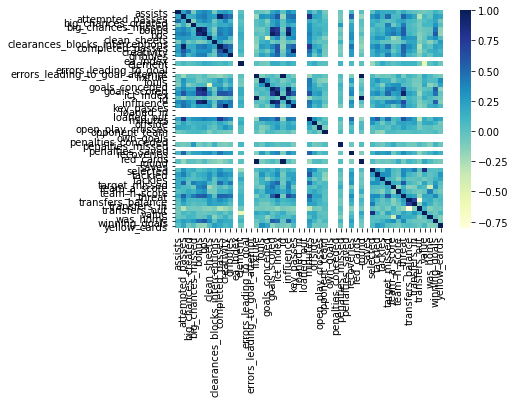

In [154]:
import seaborn as sns

corr = all_x.corr()
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap= "YlGnBu")

### *** LAST 4 GAMES FUNCTION ***

input a feature and get a summary of that features in the last 4 games (av and values)

In [235]:
def summary(features):
    if 'total_points' not in features:
        features.insert(0,"total_points")
    df = kane_17_19[features].tail(4)
    df.loc['mean'] = df.mean()
    return df

In [236]:
summary(["value", "total_points", "attempted_passes", "clean_sheets"])

,value,total_points,attempted_passes,clean_sheets
110,126.0,0.0,0.0,0.0
111,126.0,0.0,0.0,0.0
112,126.0,0.0,0.0,0.0
114,126.0,0.0,0.0,0.0
mean,126.0,0.0,0.0,0.0
